# Abstract
This project aims to compare the Newton-Raphson Method and the Secant Method for finding the roots of a function. To start with, we will first introduce the definition and formula of the Newton-Raphson Method, the proof of its convergence and the advantages and disadvantages of using this method when finding roots. Then we will introduce the Secant Method compared with the Newton-Raphson Method, and the pros and cons of using the Secant Method. After that, we will test the cases as required in the assignment sheet for both the Newton-Raphson and Secant Methods.

## Newton-Raphson and Secant Methods to determining the roots of a function

### What is Newton-Raphson Method? 
The Newton-Raphson Method is an iterative numerical method to find the roots of a function. The formula is $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$ with function f(x) and its derivative f'(x) with an initial point $x_0$. $x_n$ is defined recursively for $n>0$ and $x_n$ will converge to a value $x_{\infty}$ such that $f(x_{\infty}) = 0$. We choose a tolerance ${\epsilon}$ > 0 and stop when $|f(x_n)| < {\epsilon}$, returning $x_n$ as an approximate root of f(x). 

Geometrically, the Newton-Raphson Method uses tangent lines to a curve. If we start with an initial guess $x_0$ to be the root of $f(x) = 0$, we calculate $f(x_0)$. In most cases the $f(x_0)$ is not zero, we then need to try $f(x_1) = y_1$ for a better guess, so that we can draw a tangent line to the graph $y=f(x)$ at the point $(x_1, y_1)$. The same method is continued for $x_2$, $x_3$, etc until we find a final solution. 

Suppose the curve $y=f(x)$ meets the x-axis at point r. Let a be the current estimate of r. The tangent line to the curve $y=f(x)$ at the point $(x_n, f(x_n))$ has the equation $y = f(x_n) + (x-x_n)f'(x_n)$. If $x_{n+1}$ is the x-intercept of the tangent line, then $x_{n+1} = x_n - \frac{f(x_{n})}{f'(x_n)}$, which is in the form of the formula for Newton-Raphson Method above. 

The order of convergence of Newton-Raphson method is 2 or the convergence is quadratic. It converges if $|f(x)f''(x)| < |f'(x)|^2$. This method fails if $f'(x) = 0$. 

To see why we have this formula, suppose we have $g(x) = x - \frac{f(x)}{f'(x)}$, $g(x)$ be differentiable, then $g'(x) = \frac{f(x)f''(x)}{{f'(x)}^2}$. Then by assuming $|g'(x)| < 1$, we have $|f(x)f''(x)| < |f'(x)^2|$. 

It is also worth noting that Newton-Raphson method may not converge if the function is very nonlinear and it's disadvantage to use it for nonlinear functions. Probably using other iterative methods like secant method(introduced just below), which do not require the derivative of the function will be better when facing nonlinear functions. 

### What is Secant Method? 
An alternative method to the Newton-Raphson Method is the Secant Method which replaces the derivative $f'(x)$ with its finite-difference approximation. Consider to find the root of the function $f(x) = 0$, then using the approximation for the derivative $f'(x_n)$, we have: $f'(x_n) = \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}$. Thus, by substituting into the formula of the Newton-Raphson Method, the estimate for iteration n+1 can be $x_{n+1} = x_n - f(x_n)\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$. 

One of the advantages of using Secant Method is that it doesn't require the value of the derivative of $f(x)$ compared with the Newton-Raphson Method, which makes it easier to compute while the derivative of the function is hard to get. 

The convergence rate is set by the golden number when the function has simple root. If the function has multiplicative roots more than one, the convergence turns linear.  

## Implementation of Newton-Raphson and Secant methods in python

Here we import the packages and set the font for the matplotlib plots. "plt" refers to matplotlib.pyplot, "rc" stands for "resource configuration" which is a function in matplotlib and it allows me to modify the default settings. "font" means that I want to modify the font settings, "family" means that I want to change the font family, "serif" means that I want to use a serif font for the plots. 

In [1]:
#import packages 
%matplotlib inline
from ipywidgets import *
from IPython.display import display, Latex
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.rc('font',family='serif')
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Defining "newton" function
Given a function $f(x)$ and an initial guess $x_0$, the Newton-Raphson method approximates the root of $f(x)$ by iteratively updating the guess using the formula: $x_{n+1} = x_n - f(x_n) / f'(x_n)$ where $x_{n+1}$ is the updated guess, $x_n$ is the current guess, $f(x_n)$ is the function value at $x_n$, and $f'(x_n)$ is the derivative of $f(x)$ evaluated at $x_n$. The algorithm continues to update the guess until a stopping criterion is met, such as reaching a maximum number of iterations or the difference between consecutive guesses falling below a specified tolerance. The Newton-Raphson method uses the derivative of a function to iteratively update the guess for the root. It converges to the root when the guess becomes sufficiently close to the actual root. The method is based on linear approximation using tangent lines to the function curve. 


Let's implement the Newton-Raphson Method to find the root of a single-variable function. The initial guess $x_0$ is set to be the midpoint of the interval $(a,b)$ and an empty array is created to store the results. Inside the loop, the $f'(x)$ is first checked if divided by zero, if it is, then a RuntimeError is raised. If it's not divided by zero, the next guess "xnPlus", which corresponds to the $x_{n+1}$ in the formula for Newton-Raphson, is calculated using our formula: $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$. The ignoreError is to check if xnPlus lies within the interval $[a,b]$, if not, then a RuntimeError will be raised. If the absolute value of f(xnPlus) is less than the ${\epsilon}$, then it is considered to be convergent within the specified number of iterations, and the function will return the result based on the value of fullOutput. Otherwise, the next guess xn is updated to xnPlus and the loop continues.

In [2]:
def newton(a, b, N, epsilon, f, df, fullOutput=False, ignoreError = False ):
    '''
            Implementation of newton raphson method. 
            Attempts to find a root of a single variable function f, given and initial guess (a+b)/2.
 
            
            Inputs parameters
                a           = lower bound of interval (float).
                b           = upper bound of interval (float). 
                N           = number of iterations of algorithm (int).
                epsilon     = tolerance, this is the allowable error of the the root's value (float).
                f           = function whose root is to be found. Must be a single variable function (callable).
                df          = derivative of function f (callable).
                fullOutput  = if false function will return just the root. If true function will return message and results array (bool).
                ignoreError = if true then algorithm will not raise a RuntimeError if the next guess is outside the
                              interval [a,b]. This allows plotting even when the root finding fails (bool).
            
            Returns: 
                resultMessage = message stating if secant method did or did not converge (str).
                xn            = estimate of where the input function f is zero (float).
                results        = vector of all estimates of root (ndarray of float).            
    '''
    x0 = a+b/2.
    xn = x0
    results = np.zeros((0,2))
    for i in range(N):
        if df(xn) == 0.:
            raise RuntimeError("Division by zero.")
        
        else:
            xnPlus = xn - (f(xn)/df(xn))
            
            if ignoreError == False:
                if (xnPlus < a or xnPlus > b):
                    raise RuntimeError('xnPlus='+str(xn)+' lies outside interval ['+str(a)+','+str(b)+'] at iteration i=' +str(i+1))
            
            results = np.append(results, [xn, xnPlus])

            if abs(f(xnPlus)) < epsilon:
                resultMessage = "Did converge!"
                if fullOutput==True:
                    return resultMessage, xnPlus, results
                else:
                    return xnPlus
            else:
                xn = xnPlus
    
    if ignoreError == False:
        if i == N-1:
            raise RuntimeError("Reached final iteration (N=" +str(N)+"), and root guess xn="+str(xn)+" still above epsilon.")
    
    if fullOutput == True:
        resultMessage = "Did not converge"
        return resultMessage, xn, results
    else:
        return xn

### Visualization for Newton-Raphson method
The following code is to visualize of the Newton-Raphson method, showing the function and the tangent lines used to determine the next guess for the root. It provides a graphical representation of the algorithm's convergence.

The function plot_newton takes several input parameters, including the initial and second estimates of the root (which are a and b), the number of iterations (N), the tolerance (${\epsilon}$), the function (f) and the derivative of the function (df), the number of subplots to plot(ncols) and the zoom factor for subsequent subplots(zoomFactor) and ignoreError when the result is outside the interval. The function calls the newton function, which is defined above, to perform the root finding using the Newton-Raphson algorithm. It assigns the result message, root estimate and results array to the variables resultMessage(store a message which indicates whether the Newton-Raphson method converges or not), root(the variable to store the final estimate of the root) and res(the variable to store the results of the Newton-Raphson iterations), respectively. 

Then the function proceeds to plot the function and tangent lines from the Newton-Raphson iterations. It creates a figure with ncols subplots using plt.subplots. Inside the loop for subplots, the function plots the function f using np.linspace to generate x-values and f(np.linspace(a,b,100)) to calculate the corresponding y-values. It then iterates over the results array res and plots the tangent lines from the function in red. It also shows the location of the next guess as a grey dotted line from the x-axis to the function line.

The limits of the first subplot are set using axs2[0].set_xlim and axs2[0].set_ylim. The limits of the subsequent subplots are set by zooming in on the root. The scaleArray is used to calculate the zoom factor for each subplot. Finally, the function adjusts the position of the x-axis to be at zero for each subplot using axs2[l].spines['bottom'].set_position('zero').

In [3]:
def plot_newton(a,b,N,epsilon,f,df, ncols, zoomFactor = 2., ignoreError =False):
    '''
     Plots the function f and illustrates the root finding of the newton-raphson algorithm.
    The first panel shows the function, the inital guesses for the root and the tangent lines from the function used
    to determine the next guess. 
    Subsequent subplots show a zoom in of the function near the root.
    Tangent lines are colours with sequential red, darker lines indicating later iterations of the newtown-raphson
    algorithm.

        
    Input parameters:
        a            = initial estimate of the root (float).
        b            = second estimate of the root (float). 
        N            = number of iterations of algorithm (int).
        epsilon      = tolerance, this is the allowable error of the the root's value (float).
        f            = function whose root is to be found. Must be a single variable function (callable).
        ncols        = the number of subplot to plot. Must be 2 or more (int)
        zoomFactor   = the factor by which the limits of the subsequent subplots will be zoomed (float).
        ignoreError = if true then algorithm will not raise a RuntimeError if the next guess is outside the
                              interval [a,b]. This allows plotting even when the root finding fails (bool).
                              
    Returns:
        Function does not return anything.
    '''
    resultMessage, root, res = newton(a=a,b=b,N=N,epsilon=epsilon,f=f,df=df,ignoreError=ignoreError, fullOutput=True)
    print(resultMessage)
    print("\n root = ", root)
        
    scaleArray = np.exp(np.linspace(0.01,zoomFactor,ncols))
    fig2, axs2 = plt.subplots(nrows=1 , ncols=ncols, figsize=(8,4), tight_layout=True)
    
    if resultMessage == "Did not converge. xn diverges.":
        return "non-convergence"
    else:
        ##plot function
        for j in range(ncols):
            axs2[j].plot(np.linspace(a, b, 100), f(np.linspace(a,b,100)), label='function', color='black', lw=1.1)
            colorOffset = 10
            cmap = plt.cm.Reds(np.linspace(0,1,colorOffset+len(res)))
            count = colorOffset
            ##plot tangent from function in red. And show location of next guess as grey dotted line from x-axis to
            ##the function line
            for i in range(len(res)-1):
                labelStr = str(i)
                if i % 2== 0:
                    axs2[j].plot([res[i+1], res[i]], [0, f(res[i])], label=labelStr, color = cmap[count], lw=0.9)
                else: 
                    axs2[j].plot([res[i+1], res[i]], [0, f(res[i])], color = 'grey', ls='--', lw=0.8)
                
                count +=1

        ## setting limits of first subplot
        axs2[0].set_xlim(a, b)
        axs2[0].set_ylim(f(a), f(b))    
        
        ## setting limits of subsequent subplots. Zoom in on the root.
        indexArray = np.linspace(1,len(res),ncols)
        for k in range(ncols-2):
            axs2[k+1].set_xlim(res[int(indexArray[k+1])] - abs(res[int(indexArray[k+1])]/scaleArray[k+1]), res[int(indexArray[k+1])] + abs(res[int(indexArray[k+1])]/scaleArray[k+1]))
            axs2[k+1].set_ylim(f(res[int(indexArray[k+1])] - abs(res[int(indexArray[k+1])]/scaleArray[k+1])), f(res[int(indexArray[k+1])] + abs(res[int(indexArray[k+1])]/scaleArray[k+1])))

        axs2[-1].set_xlim(res[-1] - abs(res[-1]/scaleArray[-1]), res[-1] + abs(res[-1]/scaleArray[-1]))
        axs2[-1].set_ylim(f(res[-1] - abs(res[-1]/scaleArray[-1])), f(res[-1] + abs(res[-1]/scaleArray[-1])))
        
        for l in range(ncols):
            axs2[l].spines['bottom'].set_position('zero')
            
        return 

### Testing classes under Newton-Raphson Method

The test classes for f(x) are defined to be $x^2 - 1$, $e^{-x} - x$, $x^2 - 2x + 1.1$, $x^3 - 6x^2 + 12x - 6$, $sin(x)$, $cos(x)$, $x^2 - 5x + 13$ and $|x-3| - 2$ according to the assignment sheet. 

The derivatives f'(x) for the test classes are $2x$, $-e^{-x} - 1$, $2x-1$, $3x^2 - 12x + 12$, $cos(x)$, $-sin(x)$, $2x-5$, $2H(x-3)-1$ accordingly, where H represents the Heaviside function. 

The Heaviside function is defined as H(x) here, it returns to 0 when $x < 0$, $\frac{1}{2}$ when $x = 0$ and 1 when $x > 0$. 

So then the dfunc_7(x) is defined to represent the $f'(x)$ of the 7th test class. 

In [4]:
equationOfFunc = np.array([r'$x^2 - 1$', r'$e^{-x} - x$', r'$x^2 -2x+1.1$', r'$x^3 - 6x^2 + 12x -6$', r'$sin(x)$', r'$cos(x)$', r'$x^2 - 5x + 13$', r'$|x-3| -2$']) 

## funcs
def func_0(x):
    return x**2 - 1.

def func_1(x):
    return np.exp(-x) - x 

def func_2(x):
    return x**2 -2.*x + 1.1

def func_3(x):
    return x**3 - 6.*x**2 + 12*x - 6.

def func_4(x):
    return np.sin(x)

def func_5(x):
    return np.cos(x)

def func_6(x):
    return x**2. - 5.*x + 13.

def func_7(x):
    return abs(x-3.) - 2.

def d_func_0(x):
    return 2.*x

def d_func_1(x):
    return -np.exp(-x) - 1. 

def d_func_2(x):
    return 2.*x - 1.

def d_func_3(x):
    return 3.*x**2 - 12.*x + 12.

def d_func_4(x):
    return np.cos(x)

def d_func_5(x):
    return -np.sin(x)

def d_func_6(x):
    return 2.*x - 5

def heaviside(x):
    if x < 0:
        h = 0
    elif x == 0:
        h = 0.5
    else: 
        h = 1
    return h

def d_func_7(x):
    arg = x-3
    return 2* heaviside(arg) - 1.

### Define the "secant" function 
The code implements the secant method to find the root of a single-variable function. It iteratively updates the guesses based on the function values and uses the secant method formula to calculate the next guess. The algorithm continues until convergence or the maximum number of iterations is reached.

For the secant method, we are given the function $f(x)$ and we start with two initial guesses $x_1$ and $x_2$ that are close to the root. Then we calculate the function values at the initial guesses at $y_1 = f(x_1)$ and $y_2 = f(x_2)$ using the secant line passing through the points $(x_1, y_1)$ and $(x_2, y_2)$ to estimate the root.The equation of the secant line is given by $y = y_1 + (x - x_1) * ((y_2 - y_1) / (x_2 - x_1))$. The next guess for the root is denoted as $x_n$, which is the x-intercept of the secant line. Setting y = 0 and solving for x, we have $0 = y_1 + (x_n - x_1) * ((y_2 - y_1) / (x_2 - x_1))$ and so $x_n = x_1 - y_1 * ((x_2 - x_1) / (y_2 - y_1))$. Repeating the process for 2-4 times until the desired level of accuracy is achieved or the maximum number of iterations is reached. 

The function secant is defined with several input parameters, the initial guesses for the root a and b, the number of iterations(N), the tolerance ${\epsilon}$, function f, a flag to control the output (fullOutput), and a flag to ignore errors when the next guess is outside the interval (ignoreError). The initial guesses $x_1$ and $x_2$ are assigned the values of a and b, respectively. An empty array results is created to store the estimates of the root. The function enters a loop that iterates N times to perform the secant method iterations. Inside the loop: The function evaluates the function values $y_1$ and $y_2$ at the current guesses $x_1$ and $x_2$. The next guess $x_n$ is calculated using the secant method formula. If ignoreError is False, the next guess $x_n$ is checked to ensure it lies within the interval $[a, b]$. If it doesn't, a RuntimeError is raised. The current guess $x_n$ is appended to the results array. The guesses $x_2$ and $x_1$ are updated for the next iteration. If the absolute value of $f(x_n)$ is less than ${\epsilon}$, it is considered a convergence, and the function returns the result based on the value of fullOutput. If the loop completes without convergence and ignoreError is False, a RuntimeError is raised to indicate that the algorithm did not converge within the specified number of iterations. Finally, the function returns the result based on the value of fullOutput.

In [5]:
def secant(a, b, N, epsilon, f, fullOutput = False, ignoreError = False):
    '''
            Implementation of secant method. 
            Attempts to find a root of a single variable function f, given two initial guesses a and b.
            
            Inputs parameters
                a           = initial estimate of the root (float).
                b           = second estimate of the root (float). 
                N           = number of iterations of algorithm (int).
                epsilon     = tolerance, this is the allowable error of the the root's value (float).
                f           = function whose root is to be found. Must be a single variable function (callable).
                fullOutput  = if false function will return just the root. If true function will return message and results array (bool).
                ignoreError = if true then algorithm will not raise a RuntimeError if the next guess is outside the
                              interval [a,b]. This allows plotting even when the root finding fails (bool).
            
            Returns: 
                resultMessage = message stating if secant method did or did not converge (str).
                xn            = estimate of where the input function f is zero (float).
                results        = vector of all estimates of root (ndarray of float).            
    '''
    
    x1 = a
    x2 = b
    results = np.zeros(0)
    results = np.append(results, [x1, x2])
    for i in range(N):
        y1 = f(x1)
        y2 = f(x2)
        if y1 == y2:
            raise RuntimeError('Division by 0.')

        xn = ((x2*y1)-(x1*y2))/(y1-y2)

        if ignoreError == False:
            if (xn < a or xn > b):
                raise RuntimeError('xn='+str(xn)+' lies outside interval ['+str(a)+','+str(b)+'] at iteration i=' +str(i+1))
        
            
        results = np.append(results, [xn])
        x2 = x1
        x1 = xn
        if abs(f(xn)) < epsilon:
            if fullOutput == True:
                resultMessage = "Did converge!"
                return resultMessage, xn, results
            else:
                return xn
            
    if ignoreError == False:
        if i == N-1:
            raise RuntimeError("Reached final iteration (N=" +str(N)+"), and root guess xn="+str(xn)+" still above epsilon.")
    
    if fullOutput == True:
        resultMessage = "Did not converge"
        return resultMessage, xn, results
    else:
        return xn

### Visualization for Secant Method
The code implements the plot_secant function to visualize the secant method for finding the root of a single-variable function. It plots the function, the initial guesses, and the tangent lines used in the secant iterations. The subsequent subplots zoom in on the intermediate root guesses to show the progression of the secant algorithm.

The function plot_secant illustrates the root-finding process using the secant method. Same as the plot_newton, we have the parameters including the initial guesses for the root (a and b), the number of iterations (N), the tolerance (epsilon), the function f, the number of subplots to plot (ncols), the zoom factor for subsequent subplots (zoomFactor), flags to control the plotting limits (givePlottingLimits, xlim, ylim), and a flag to ignore errors when the next guess is outside the interval (ignoreError). The function performs some input validation, checking if ncols is greater than or equal to 2. If not, a RuntimeError is raised. If ignoreError is True, a message is printed to indicate that the secant algorithm is ignoring RuntimeError exceptions. The secant function is called to perform the root finding using the secant method. The result message, root estimate, and results array are assigned to the variables resultMessage, root, and res, respectively. If the result message indicates that the algorithm did not converge, the function returns the string "non-convergence". Otherwise, the function proceeds to plot the function and the tangent lines from the secant iterations. It creates a figure with ncols subplots using plt.subplots. It generates a colormap of sequentially darker reds to differentiate the tangent lines. It loops through the subplots and plots the tangent lines and the function. It adjusts the position of the x-axis to be at zero for each subplot. It sets the limits of the first subplot either based on the user-defined limits (xlim and ylim) or automatically based on the initial guesses (a and b). It sets the limits of the subsequent subplots to zoom in on the intermediate root guesses obtained from the secant method. Finally, the function does not return anything.

In [6]:
def plot_secant(a,b,N,epsilon,f, ncols, zoomFactor = 2., givePlottingLimits = False, xlim=None, ylim=None, ignoreError=False):
    '''
    Plots the function f and illustrates the root finding of the secant algorithm.
    The first panel shows the function, the inital guesses for the root and the tangent lines from the function used
    to determine the next guess. 
    Subsequent subplots show a zoom in of the function near the root.
    Tangent lines are colours with sequential red, darker lines indicating later iterations of the secant algorithm.

        
    Input parameters:
        a            = initial estimate of the root (float).
        b            = second estimate of the root (float). 
        N            = number of iterations of algorithm (int).
        epsilon      = tolerance, this is the allowable error of the the root's value (float).
        f            = function whose root is to be found. Must be a single variable function (callable).
        ncols        = the number of subplot to plot. Must be 2 or more (int)
        zoomFactor   = the factor by which the limits of the subsequent subplots will be zoomed (float).
        givePlotLims = if true then expect the limits for the first figure to be given as arguments 
        xlim         = upper and lower x limits for the first figure (tuple)
        ylim         = upper and lower y limits for the first figure (tuple)
        ignoreError = if true then algorithm will not raise a RuntimeError if the next guess is outside the
                      interval [a,b]. This allows plotting even when the root finding fails (bool).
    Returns:
        Function does not return anything.  
    '''
    
    if ncols < 2:
        raise RuntimeError("ncols must be 2 or greater.")
    if ignoreError == True:
        print("Beware secant algorithm is ignoring runtimeErrors. Roots may be outside initial guess region [a,b] \n ")
    resultMessage, root, res = secant(a=a,b=b,N=N,epsilon=epsilon, f=f, fullOutput=True, ignoreError=ignoreError)
    print(resultMessage, "\n", " root = " ,root)
    fig2, axs2 = plt.subplots(nrows=1 , ncols=ncols, figsize=(8,4), tight_layout=True)

    ## scale array is an exponential function between 0.01 and the zoomFactor. This is used to scale the limits of 
    ## the subplots. 
    scaleArray = np.exp(np.linspace(0.01,zoomFactor,ncols))
    
    if resultMessage == "Division by 0 no root":
        return "non-convergence"
    
    else:
        ##loop through subplots. Define a colormap of sequentially darker reds.
        ## plot the actual function last so it appears above all other lines on figure.
        
        for j in range(ncols):
            cmapOffset = 10
            cmap = plt.cm.Reds(np.linspace(0,1,cmapOffset+len(res)))
            count = cmapOffset
            
            ##loop through the results array. Plots horizontal grey lines from function to x-axis, indicating
            ##locations of guesses. Show tangent lines from function as red lines (using colourmap)
            for i in range(len(res)-2):
                labelStr = str(i)
                axs2[j].plot([res[i], res[i]], [f(res[i]), 0.0], color='grey', ls='--',lw=0.8)
                axs2[j].plot([res[i+1], res[i+1]], [f(res[i+1]), 0.0], color='grey', ls='--',lw=0.8)
                axs2[j].plot([res[i+2], res[i+2]], [f(res[i+2]), 0.0], color = 'grey', ls='--',lw=0.8)
                axs2[j].plot([res[i], res[i+1]], [f(res[i]), f(res[i+1])], color=cmap[count],lw=1.2)
                count +=1
            
            axs2[j].plot(np.linspace(a, b, 1000), f(np.linspace(a,b,1000)), color= 'black', label='function', lw=1.3)

        for mm in range(ncols):
            axs2[mm].spines['bottom'].set_position('zero')
        
        ## formatting first plot and sorting out limits. Either automatically or using user defined limits
        
        if givePlottingLimits == True:
            axs2[0].set_xlim(xlim[0], xlim[1])
            axs2[0].set_ylim(ylim[0], ylim[1])
            
        else: 
            axs2[0].set_xlim(a, b)
            axs2[0].set_ylim(min(f(a),f(b)), max(f(a), f(b)))    
            
        ## sorting out the limits for the subsequent plots. As the data in all the suplots is the same, the limits
        ## effectively zoom in on the figure. The idea is to zoom in on different roots to show the progression
        ## of the secant algorithm as it iterates towards finding a root. 
        ## each subsequent subplot will have x limits centered around a particualar intermediate root guess from 
        ## the algorithm. x-limits are rootGuess - rootGuess/scaleArray and rootGuess + rootGuess/scaleArray
        ## where scaleArray is an exponential function between 0.01 and the zoomFactor.
        indexArray = np.linspace(1,len(res),ncols)
        for k in range(ncols-2):
            xlim_a = res[int(indexArray[k+1])] - abs(res[int(indexArray[k+1])]/scaleArray[k+1])
            xlim_b = res[int(indexArray[k+1])] + abs(res[int(indexArray[k+1])]/scaleArray[k+1])
            axs2[k+1].set_xlim(xlim_a, xlim_b)
            ylim_a = f(res[int(indexArray[k+1])]) - abs(res[int(indexArray[k+1])]/scaleArray[k+1])
            ylim_b = f(res[int(indexArray[k+1])]) + abs(res[int(indexArray[k+1])]/scaleArray[k+1])
            axs2[k+1].set_ylim( ylim_a, ylim_b )

        ## the final sublplot is set to show the final root guess from the secant array. 
        finalFig_xlim_a = res[-1] - abs(res[-1]/scaleArray[-1])
        finalFig_xlim_b = res[-1] + abs(res[-1]/scaleArray[-1])
        axs2[-1].set_xlim(finalFig_xlim_a,finalFig_xlim_b )
        finalFig_ylim_a = f(res[-1])  - abs(res[-1]/scaleArray[-1])
        finalFig_ylim_b = f(res[-1]) + abs(res[-1]/scaleArray[-1])
        axs2[-1].set_ylim(finalFig_ylim_a, finalFig_ylim_b)
        
        return 

### Testing classes under Secant Method
The testing classes are same as which in the Newton-Raphson Method as required. 

In [7]:
equationOfFunc = np.array([r'$x^2 - 1$', r'$e^{-x} - x$', r'$x^2 -2x+1.1$', r'$x^3 - 6x^2 + 12x -6$', r'$sin(x)$', r'$cos(x)$', r'$x^2 - 5x + 13$', r'$|x-3| -2$']) 

## funcs
def func_0(x):
    return x**2 - 1.

def func_1(x):
    return np.exp(-x) - x 

def func_2(x):
    return x**2 -2.*x + 1.1

def func_3(x):
    return x**3 - 6.*x**2 + 12*x - 6.

def func_4(x):
    return np.sin(x)

def func_5(x):
    return np.cos(x)

def func_6(x):
    return x**2. - 5.*x + 13.

def func_7(x):
    return abs(x-3.) - 2.

## Graphs for testing functions under Newton's and Secant Methods

The first testing function is $f(x) = x^2 - 1$ according to the assignment sheet, which is called func_0 in this program. The two figures displayed below are the root estimation process for Newton-Raphson method and Secant method.  

The first diagram is the one for Newton-Raphson method. At x = 1, f(1) = 0 because $f(x) = x^2 - 1$ in this case. From the Newton-Raphson method, the testing formula of convergence is $|f(x)f''(x)| < |f'(x)^2|$, here f(1) = 0, f'(1) = 2, f''(1) = 2 because f'(x) = 2x and f''(x) = 2. So plugging these values into the formula of convergence, we have |0 * 2| < |2^2| = 4, which is absolutely right. So the function $f(x) = x^2 - 1$ converges at x = 1, where x= 1 is the root. 

On the graph(1st graph), the root found by the python program is 1.000000000013107, which is nearly equal to 1. We can see the process how it gets the correct values on these diagrams, where it has different guesses near 1.1, 1.005, etc, and finally gets the correct answer at x = 1.000000000013107. 

For the secant method, we are given by the function $f(x) = x^2 - 1$ and we start to calculate the secant method using the process mentioned before. Starting with two initial guesses $x_1$ and $x_2$ that are close to the root. Then we calculate the function values at the initial guesses at $y_1 = f(x_1)$ and $y_2 = f(x_2)$ using the secant line passing through the points $(x_1, y_1)$ and $(x_2, y_2)$ to estimate the root.The equation of the secant line is given by $y = y_1 + (x - x_1) * ((y_2 - y_1) / (x_2 - x_1))$. The next guess for the root is denoted as xn, which is the x-intercept of the secant line. Setting y = 0 and solving for x, we have $0 = y_1 + (x_n - x_1) * ((y_2 - y_1) / (x_2 - x_1))$ and so $x_n = x_1 - y_1 * ((x_2 - x_1) / (y_2 - y_1))$. 

In the case of the function $f(x) = x^2 - 1$, the secant method converges to the root $x = 1$ when the initial guesses $x_1$ and $x_2$ are chosen appropriately. The graph obtained by the code shows the function $f(x) = x^2 - 1$, the initial guesses, and the secant lines used in the iterations. As the iterations progress, the secant lines get closer to the root, and the algorithm converges to the root $x = 1$.


<IPython.core.display.Latex object>

Did converge!

 root =  1.000000000013107
Did converge! 
  root =  0.9999999998835847


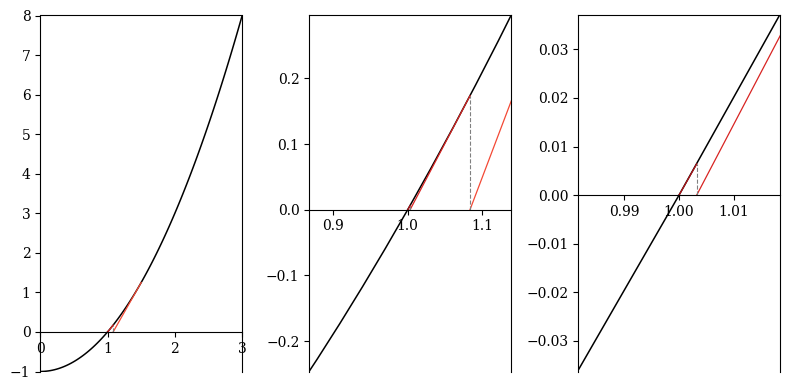

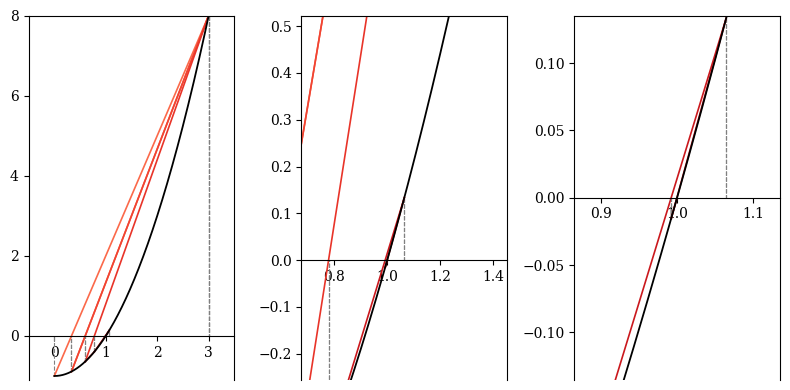

In [8]:
#0
display(Latex(equationOfFunc[0]))
plot_newton(0,3,100, 1e-8, func_0, d_func_0,3, zoomFactor = 4)
plot_secant(0,3,100, 1e-8, func_0,3, zoomFactor = 2, givePlottingLimits = True, xlim=[-0.5,3.5], ylim=[-1.1, 8])

The second testing function is $f(x) = e^{-x} - x$ according to the assignment sheet, which is called func_1 in this program. Same as func_0, the two figures displayed below are the root estimation process for Newton-Raphson method and Secant method. We have $f'(x) = -e^{-x} - 1$ and $f''(x) = e^{-x}$. 

According to the root found by the program for Newton-Raphson method, the root for the function is 0.5671432904096159, which is very near to $\frac{1}{2}$. So suppose at x = 1/2, the function f(x) is nearly equal to 0, then $f(\frac{1}{2}) = e^{-\frac{1}{2}} - \frac{1}{2}$, $f'(\frac{1}{2}) = -e^{-\frac{1}{2}} - 1$ and  $f''(\frac{1}{2}) = -e^{-\frac{1}{2}}$. Substituting all these values into the formula of convergence, $|f(x)f''(x)| < |f'(x)^2|$, we have $f(x)f''(x) = (-e^{-\frac{1}{2}} - \frac{1}{2})(-e^{-\frac{1}{2}} - 1) = -e^{-1} + \frac{1}{2}e^{-\frac{1}{2}} - e^{-\frac{1}{2}} + \frac{1}{2} = -0.171$ approximately. So the absolute value for $f(x)f''(x)$ is 0.171. The $|f'(x)^2| = |{e^\frac{1}{2}}^2| = 0.606, which is bigger than 0.171. Therefore the root $x = 0.5671432904096159$ is correct. 

Looking at the diagram for Newton-Raphson method (the 1st one), the program has a first root guess near 1.5, then its tangent goes to 0.45. The dotted grey line leads us to the next tangent which gives the correct result.  

The function $f(x) = e^{-x} - x$ is a non-linear function. The secant method converges to the root of the function $e^{-x} - x$ by the following process: It starts with two initial guesses, $x_1$ and $x_2$, which are close to the root. Then it calculates the function values at the initial guesses: $y_1 = e^{-x_1} - x_1$ and $y_2 = e^{-x_2} - x_2$. It uses the secant line $y = y_1 + (x - x_1) * ((y_2 - y_1) / (x_2 - x_1))$ passing through the points $(x_1, y_1)$ and $(x_2, y_2)$ to estimate the root. The next guess for the root, denoted as xn, is the x-intercept of the secant line. We find $x_n$ by setting y to zero and solving for x, we have $0 = y_1 + (x_n - x_1) * ((y_2 - y_1) / (x_2 - x_1))$ and $xn = x1 - y1 * ((x2 - x1) / (y2 - y1))$ and we got the result for the function did converge to the root $x= 0.5671432907465658$. 


<IPython.core.display.Latex object>

Did converge!

 root =  0.5671432904096159
Did converge! 
  root =  0.5671432907465658


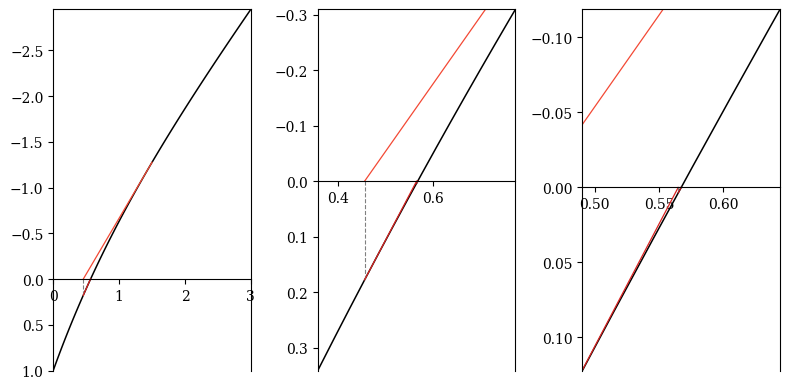

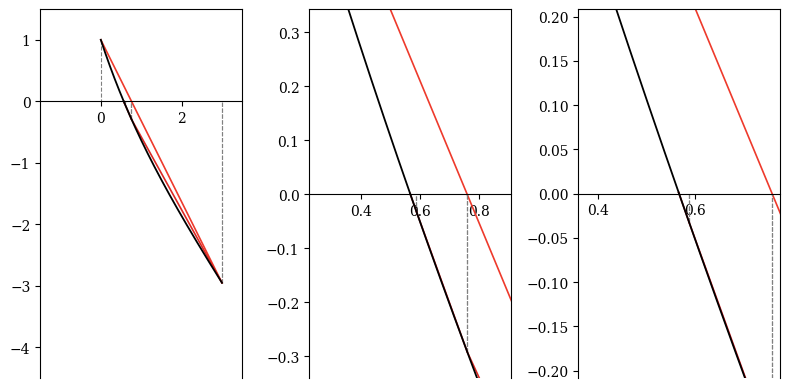

In [9]:
#1
display(Latex(equationOfFunc[1]))
plot_newton(0,3,100, 1e-8, func_1, d_func_1,3, zoomFactor = 2)
plot_secant(0,3,100, 1e-8, func_1,3, zoomFactor=1,  givePlottingLimits = True, xlim=[-1.5,3.5], ylim=[-4.5, 1.5])

The third testing function is $f(x) = x^2 - 2x + 1.1$ according to the assignment sheet, which is called func_2 in this program. The function didn't converge because it doesn't has the root when f(x) = 0, which means geometrically the curve of the function doesn't touch the x-axis. The lowest point for the function is at $\frac{-(-2)}{2*1}$ = 1, so the curve doesn't touch the x-axis, and thus there's no root for the function. 

Therefore, for both Newton-Raphson method and Secant method, they can't find the root for the function $f(x) = x^2 - 2x + 1.1$. 

In [10]:
#2
display(Latex(equationOfFunc[2]))
plot_newton(0,3,100, 1e-8, func_2, d_func_2,3, zoomFactor = 2, ignoreError=False)

<IPython.core.display.Latex object>

RuntimeError: xnPlus=0.5111689534361344 lies outside interval [0,3] at iteration i=8

In [11]:
#2
display(Latex(equationOfFunc[2]))
plot_secant(0,3,100, 1e-8, func_2,3, givePlottingLimits = True, xlim=[-5.,5], ylim=[0., 1], ignoreError=False)

<IPython.core.display.Latex object>

RuntimeError: xn=-1.1000000000000003 lies outside interval [0,3] at iteration i=1

The fourth testing function is $f(x) = x^3 - 6x^2 + 12x -6$ according to the assignment sheet, which is called func_3 in this program. The Newton-Raphson method fails because it faces a division by zero during the process, as shown in the error message. 

In [12]:
#3
display(Latex(equationOfFunc[3]))
plot_newton(0,6,100, 1e-8, func_3, d_func_3,3, zoomFactor = 2, ignoreError=True)

<IPython.core.display.Latex object>

RuntimeError: Division by zero.

Same as before, the secant method successfully find the root for $f(x) = x^3 - 6x^2 + 12x - 6$ within the tolerance. It starts with two initial guesses $x_1$ and $x_2$ which are close to the root. Then it calculates the function values for f(x) at the initial guesses: $y_1 = x_1^3 - 6x_1^2 + 12x_1 - 6$ and $y_2 = x_2^3 - 6x_2^2 + 12x_2 - 6$. It uses the secant line passing through the points $(x_1, y_1)$ and $(x_2, y_2)$ to estimate the root, and the next guess $x_n$ is found by setting y to zero and solving for x: $0 = y_1 + (x_n - x_1) * ((y_2 - y_1) / (x_2 - x_1))$ and $x_n = x_1 - y_1 * ((x_2 - x_1) / (y_2 - y_1))$. 

<IPython.core.display.Latex object>

Did converge! 
  root =  0.7400789501050374


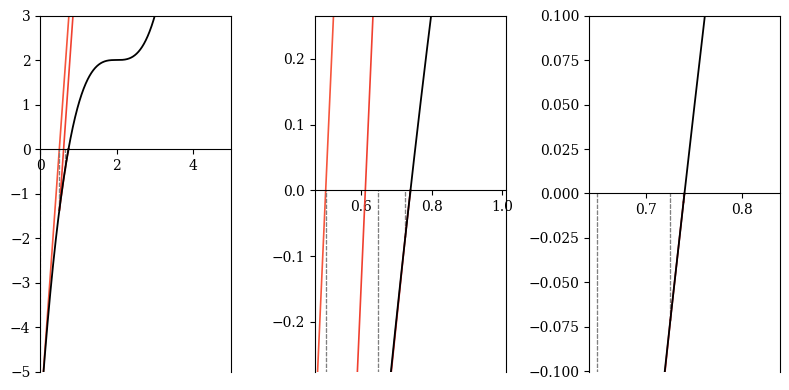

In [ ]:
#3
display(Latex(equationOfFunc[3]))
plot_secant(0,6,100, 1e-8, func_3,3,givePlottingLimits = True, xlim=[0.,5], ylim=[-5., 3])

The fifth testing function is $f(x) = sin(x)$ according to the assignment sheet, which is called func_4 in this program. 

The reason for Newton-Raphson Method failed might be the graph of sin(x) is periodic like a wave and when it takes the tangent at one point, it might lead to a point in another period. So that the program is taking the tangent again and again and it can't run out of the trap of the sin function because it is infinite. 

In [13]:
#4
display(Latex(equationOfFunc[4]))
plot_newton(0,5,2, 1e-8, func_4, d_func_4,3, zoomFactor = 2, ignoreError=False)

<IPython.core.display.Latex object>

RuntimeError: Reached final iteration (N=2), and root guess xn=3.141200277699888 still above epsilon.

The root 6.283185307181166 is the value of ${2\pi}$, which is absolutely correct for $f(x) = sin(x)$ when $f(x) = 0$ because $sin(x)$ is a periodic function with roots at integer multiples of ${\pi}$. 

<IPython.core.display.Latex object>

Did converge! 
  root =  6.283185307181166


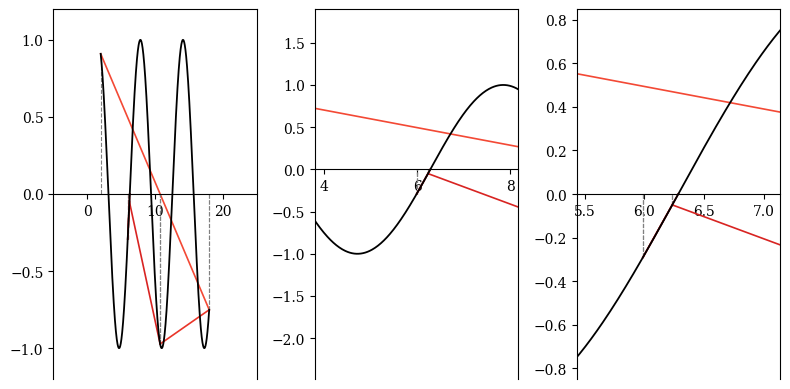

In [ ]:
#4
display(Latex(equationOfFunc[4]))
plot_secant(2,18,10, 1e-8, func_4,3, givePlottingLimits = True, xlim=[-5.,25], ylim=[-1.2,1.2])

The sixth testing function is $cos(x)$, which is called func_5 in this program. 

The taylor expansion for cos(x) is $cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!}$ + $\cdot\cdot\cdot$, which is the derivative of the function sin(x), whose taylor expansion is $sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!}$ + $\cdot\cdot\cdot$. 

Both cos(x) and sin(x) are trigonometric functions and are defined everywhere in the real line, which means that there are no restrictions on the starting state of the method as long as the initial guess is close to the root. The method will converge to the root of the function cos(x) which is x=$\frac{\pi}{2}$ regardless of the starting state. Here the result is $\frac{7{\pi}}{2}$, which is periodically same as $\frac{\pi}{2}$. 

<IPython.core.display.Latex object>

Did converge!

 root =  10.995574287564276


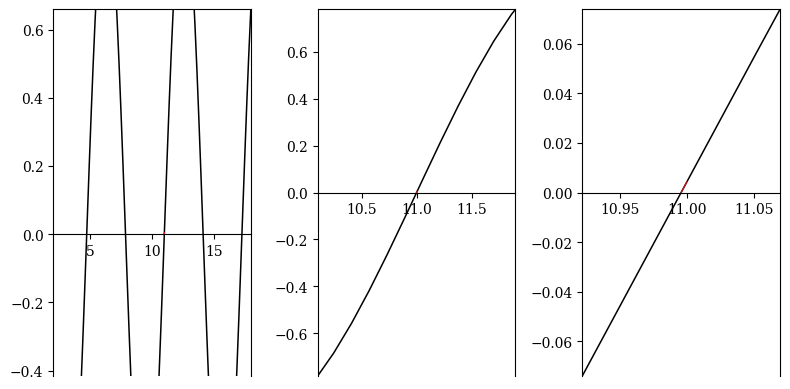

In [ ]:
#5
display(Latex(equationOfFunc[5]))
plot_newton(2,18,100, 1e-8, func_5, d_func_5,3, zoomFactor = 5, ignoreError=False)


There's an error message when doing with the secant method in the program because during Secant method iterations, the value of xn is found outside the interval [2, 18] at the iteration i = 2. 

In [ ]:
#5
display(Latex(equationOfFunc[5]))
plot_secant(2,18,100, 1e-8, func_5,4, givePlottingLimits = True, xlim=[-10.,10], ylim=[-1., 1], ignoreError=False)

<IPython.core.display.Latex object>

RuntimeError: xn=30.357881704050612 lies outside interval [2,18] at iteration i=2

The Newton-Raphson method didn't find the root successfully because the process has reached final iteration of N = 100 but the root guess xn=4.0 is still above the ${\epsilon}$. 

In [ ]:
#6
display(Latex(equationOfFunc[6]))
plot_newton(0,8,100, 1e-8, func_6, d_func_6,3, zoomFactor = 2, ignoreError=False)

<IPython.core.display.Latex object>

RuntimeError: Reached final iteration (N=100), and root guess xn=4.0 still above epsilon.

An error message appears because xn=-4.333333333333333 lies outside interval [0,8] at iteration i=1 for the Secant Method. 

In [ ]:
#6
display(Latex(equationOfFunc[6]))
plot_secant(0,8,4, 1e-8, func_6,4, givePlottingLimits = True, xlim=[-10.,10], ylim=[-1., 15], ignoreError=False)

<IPython.core.display.Latex object>

RuntimeError: xn=-4.333333333333333 lies outside interval [0,8] at iteration i=1

The last testing function is $|x-3| - 2$, whose derivative function is $2H(x-3) - 1$ where H is defined to be the Heaviside function. 

The Heaviside function is given in the assignment sheet to be: 

\begin{equation}
  H(t) = 
  \begin{cases}
  0, & \text{if}\ t < 0\\
  \frac{1}{2}, & \text{if}\ t = 0\\
  1, & \text{if}\ t > 0
  \end{cases}
\end{equation}

For the Newton-Raphson method, we want to solve f(x) = 0 where $f(x) = |x-3| - 2$. So we will have two conditions, either $x-3 = 2$ when $x \ge 3$ or $3-x=2$ when $x<3$. When $x-3 = 2$, the H(t) value will be either $\frac{1}{2}$ or 1 because $t=x-3$ as defined and x = 5 under this condition. So $f'(x) = 2(x-3) - 1$ or $f'(x) = x-4$ for x = 5. When $3-x = 2$, the H(t) value will be 0 because the root x = 1 under this condition (thus $x-3= -2$, H(t) = 0 by definition of H(t)). Hence we have f'(x) = -1 here. 

The derivative function of f(x) = |x - 3| - 2 is not continuous at x = 3, where the absolute value changes sign. Since the derivative is not continuous, it poses process for the Newton-Raphson method, which relies on the differentiability of the function and its derivative.The Newton-Raphson method requires evaluating the function and its derivative at each iteration. In the case of f(x) = |x - 3| - 2, the derivative function is not well-defined at x = 3 due to the discontinuity caused by the absolute value. This discontinuity leads to difficulties in using the Newton-Raphson method, as it assumes smoothness and continuous differentiability for convergence.Therefore, the Newton-Raphson method may not be applicable or may not converge well for the specific function f(x) = |x - 3| - 2 due to the non-differentiability at x = 3.

So we will get the result of the root x = 1. 

<IPython.core.display.Latex object>

Did converge!

 root =  1.0
Did converge! 
  root =  1.0


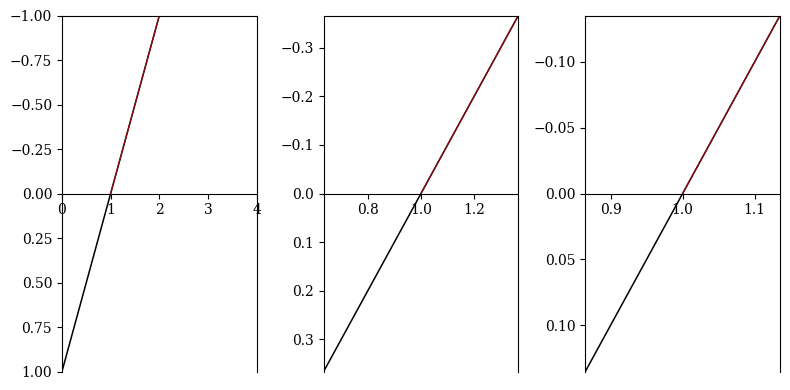

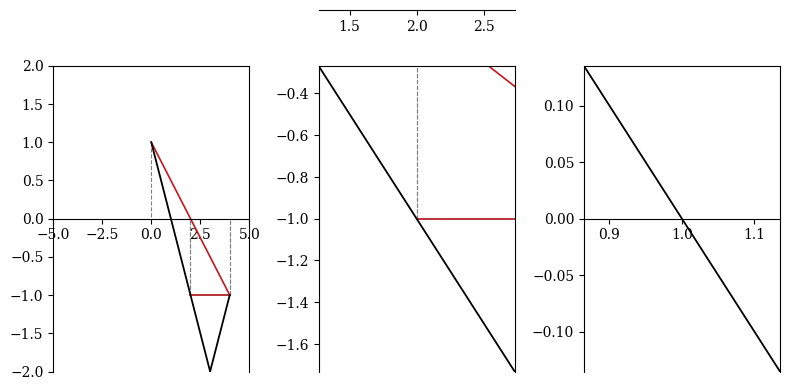

In [ ]:
#7
display(Latex(equationOfFunc[7]))
plot_newton(0,4,100, 1e-8, func_7, d_func_7,3, zoomFactor = 2, ignoreError=False)
plot_secant(0,4,100, 1e-8, func_7,3, givePlottingLimits = True, xlim=[-5.,5], ylim=[-2., 2])

## References

##### secant algorithm
Secant method (2024) Wikipedia. Available at: https://en.wikipedia.org/wiki/Secant_method (Accessed: 15 March 2024). 

##### runtime error code
Gunasekaran, B. (2023) Runtimeerror in python: Everything you need to know!, Embedded Inventor. Available at: https://embeddedinventor.com/runtimeerror-in-python-everything-you-need-to-know/ (Accessed: 15 March 2024). 

##### docstring code
Python docstrings (no date) Programiz. Available at: https://www.programiz.com/python-programming/docstrings (Accessed: 15 March 2024). 

##### matplotlib colour maps
Choosing colormaps in matplotlib# (no date) Choosing Colormaps in Matplotlib - Matplotlib 3.8.3 documentation. Available at: https://matplotlib.org/stable/users/explain/colors/colormaps.html (Accessed: 15 March 2024). 

PaleNeutron, PaleNeutronPaleNeutron 2 and hitzghitzg 12.3k5353 silver badges5555 bronze badges (1960a) How can I generate a COLORMAP array from a simple array in Matplotlib, Stack Overflow. Available at: https://stackoverflow.com/questions/28144142/how-can-i-generate-a-colormap-array-from-a-simple-array-in-matplotlib (Accessed: 15 March 2024). 

##### secant method in python
Secant method python program with output (no date) Codesansar. Available at: https://www.codesansar.com/numerical-methods/secant-method-python-program.htm (Accessed: 15 March 2024). 

##### latex in jupyter 
kamekame 21.4k3333 gold badges107107 silver badges166166 bronze badges et al. (1956) How to render latex markup using python?, Stack Overflow. Available at: https://stackoverflow.com/questions/4028267/how-to-render-latex-markup-using-python (Accessed: 15 March 2024). 
    
##### plotting axis in middle of figure matplotlib
ShanShan 18.9k4141 gold badges100100 silver badges137137 bronze badges et al. (1961) How to draw axis in the middle of the figure?, Stack Overflow. Available at: https://stackoverflow.com/questions/31556446/how-to-draw-axis-in-the-middle-of-the-figure (Accessed: 15 March 2024). 

##### convergence for Newton-Raphson and Secant Methods
says:, L.Z. et al. (no date) Engineering at Alberta Courses " newton raphson method. Available at: https://engcourses-uofa.ca/books/numericalanalysis/finding-roots-of-equations/open-methods/newton-raphson-method/ (Accessed: 14 March 2024). 

PAMGPAMG 4 et al. (1965) Condition for convergence of Newton-Raphson method., Mathematics Stack Exchange. Available at: https://math.stackexchange.com/questions/3136446/condition-for-convergence-of-newton-raphson-method (Accessed: 14 March 2024). 

##### newton-raphson method
Admin (2022) Newton Raphson method - formula, solved examples, BYJUS. Available at: https://byjus.com/maths/newton-raphson-method #:~:text=The%20order%20of%20convergence%20of,’(x)%20%3D%200. (Accessed: 14 March 2024). 

##### secant method
Name (no date) Engineering at Alberta Courses " Secant Method. Available at: https://engcourses-uofa.ca/books/numericalanalysis/finding-roots-of-equations/open-methods/secant-method/ (Accessed: 15 March 2024). 